<a href="https://colab.research.google.com/github/voideans/Gender_Classification_DataScience/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns

from google.colab import files
data = pd.read_csv('https://raw.githubusercontent.com/voideans/Gender_Classification_DataScience/main/voice.csv')

In [141]:
#finding stats of missing values
print(data.isnull().sum())
print("\ntotal missing values are:",data.isnull().sum().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

total missing values are: 0


In [142]:
# converting to male=1, female=0
# %matplotlib inline
# %%capture
data=pd.DataFrame(data)
data['label'].replace('female',0,inplace=True)
data['label'].replace('male',1,inplace=True)

'''
# replacing null values with mean of the respective column
n=len(data.columns)-1
for i in [0,n]:
    data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].mean())
'''


'\n# replacing null values with mean of the respective column\nn=len(data.columns)-1\nfor i in [0,n]:\n    data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].mean())\n'

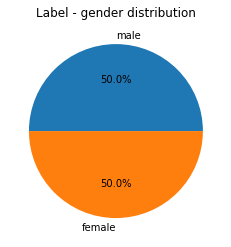

In [143]:
# pie chart

fem = (data['label'] == 0).sum()
mal = (data['label'] == 1).sum()

val = [mal,fem]
lab = ['male','female']
plt.pie(val, labels=lab, autopct='%1.1f%%')
plt.title('Label - gender distribution')
plt.show()

In [144]:
# splitting data into test and train

from sklearn.model_selection import train_test_split
x = data.drop('label',axis=1) 
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [145]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_train = sc1.fit_transform(x_train)
x_test = sc1.fit_transform(x_test)

print("\ntraining data:\nmean = ",x_train.mean(),"\nstd div = ",x_train.std())
print("\ntest data:\nmean = ",x_test.mean(),"\nstd div = ",x_test.std())

if((x_train.std() == 1) and (x_test.std() == 1)):
    print("\nData is standardized successfully")


training data:
mean =  2.0700796159230228e-16 
std div =  1.0

test data:
mean =  -7.957182056619419e-17 
std div =  1.0

Data is standardized successfully


In [146]:
# 1 - Decision Tree Classifier

# Using gini index
data_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
data_gini.fit(x_train, y_train)
y_pred_gini = data_gini.predict(x_test) # predicting y

# Using Entropy
data_ent = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=5)
data_ent.fit(x_train, y_train)
y_pred_ent = data_gini.predict(x_test) # predicting y


### Confusion Matrix

# representing gini impurity in confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix: (entropy)\n",cm1)

### stats

TN1 = cm1[0][0]
FN1 = cm1[0][1]
FP1 = cm1[1][0]
TP1 = cm1[1][1]

# all true values by total values
accu1 = (TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)*100
# actual positives that got predicted as positive
sensitivity1 = TP1 / (TP1 + FN1 )* 100
# actual negatives that got predicted as negative
specificity1 = TN1/(TN1 + FP1)*100
# positive predictive value - proportion of all positively classifed cases that were truly positive
ppv1 = TP1 / (TP1 + FP1) *100
# positive predictive value - proportion of all negatively classifed cases that were truly negative
npv1 = TN1 / (TN1 + FN1) *100


Confusion Matrix: (entropy)
 [[301  13]
 [ 10 310]]


In [147]:
# 2 - Random Forest Classifier


from sklearn.ensemble import RandomForestClassifier

data_rfc = RandomForestClassifier(n_estimators = 100) 
 
# Fitting the model
data_rfc.fit(x_train, y_train)
 
# performing predictions
y_pred_rfc = data_rfc.predict(x_test)

# #accuracy
# from sklearn import metrics
# print("accuracy of Random Forest: ", metrics.accuracy_score(y_test, y_pred_rfc))


# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix: (Random Forest)\n",cm2)

### stats

TN2 = cm2[0][0]
FN2 = cm2[0][1]
FP2 = cm2[1][0]
TP2 = cm2[1][1]

accu2 = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)*100
sensitivity2 = TP2 / (TP2+FN2)* 100
specificity2 = TN2/(TN2 + FP2)*100
ppv2 = TP2 / (TP2+FP2) *100
npv2 = TN2 / (TN2+FN2) *100


Confusion Matrix: (Random Forest)
 [[313   1]
 [ 10 310]]


Best parameters chosen are:
 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


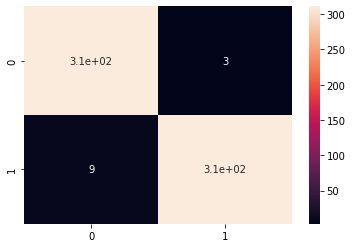

[[311   3]
 [  9 311]]


In [149]:
# 3 - KNN

knn = KNeighborsClassifier
grid_params = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform','distance'] , 'metric' : ['euclidean', 'manhattan']  }
gs = GridSearchCV(knn() , grid_params , cv = 4 , scoring='accuracy')
gs_results = gs.fit(x_train, y_train)

model = gs_results.best_estimator_
model.score(x_test, y_test)

print("Best parameters chosen are:\n",gs_results.best_params_)

### Confusion Matrix

y_pred_knn = model.predict(x_test)
cm3 = metrics.confusion_matrix(y_test,y_pred_knn)
cm3 = pd.DataFrame(cm3)
sns.heatmap(cm3, annot=True)
plt.show()
print(confusion_matrix(y_test, y_pred_knn))

### stats

TN3 = cm3[0][0]
FN3 = cm3[0][1]
FP3 = cm3[1][0]
TP3 = cm3[1][1]

accu3 = (TP3 + TN3) / (TP3 + TN3 + FP3 + FN3)*100
sensitivity3 = TP3 / (TP3+FN3 )* 100
specificity3 = TN3/(TN3 + FP3)*100
ppv3 = TP3 / (TP3+FP3) *100
npv3 = TN3 / (TN3+FN3) *100


In [150]:
# 4 - Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred_logistic = classifier.predict(x_test)

### Confusion Matrix

cm4 = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix: (Random Forest)\n",cm2)

### stats

TN4 = cm4[0][0]
FN4 = cm4[0][1]
FP4 = cm4[1][0]
TP4 = cm4[1][1]

accu4 = (TP4 + TN4) / (TP4 + TN4 + FP4 + FN4)*100
sensitivity4 = TP4 / (TP4+FN4)* 100
specificity4 = TN4/(TN4 + FP4)*100
ppv4 = TP4 / (TP4+FP4) *100
npv4 = TN4 / (TN4+FN4) *100


Confusion Matrix: (Random Forest)
 [[313   1]
 [ 10 310]]


In [151]:
# 5 - SVM Classifier

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model 
clf.fit(x_train, y_train)

#Predict 
y_pred_svm = clf.predict(x_test)

### Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix: (SVM))\n",cm5)

### stats

TN5 = cm5[0][0]
FN5 = cm5[0][1]
FP5 = cm5[1][0]
TP5 = cm5[1][1]

accu5 = (TP5 + TN5) / (TP5 + TN5 + FP5 + FN5)*100
sensitivity5 = TP5 / (TP5+FN5)* 100
specificity5 = TN5/(TN5 + FP5)*100
ppv5 = TP5 / (TP5+FP5) *100
npv5 = TN5 / (TN5+FN5) *100

Confusion Matrix: (SVM))
 [[306   8]
 [ 12 308]]


In [152]:
# Results

from tabulate import tabulate
info = {'Dataset': ['Decision Tree','Random Forest','KNN','Logistic Regression','SVM'],
        'Accuracy %':[accu1,accu2,accu3,accu4,accu5],
        'Sensitivity %': [sensitivity1,sensitivity2,sensitivity3,sensitivity4,sensitivity5],
        'Specificity %': [specificity1,specificity2,specificity3,specificity4,specificity5],
        'positive predictive value in %':[ppv1,ppv2,ppv3,ppv4,ppv5],
        'negative predictive value in %':[npv1,npv2,npv3,npv4,npv5]}
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

print("\nDecision Tree Classifier:\n",classification_report(y_test, y_pred_gini))
print("\nRandom Forest:\n",classification_report(y_test, y_pred_rfc))
print("\nKNN:\n",classification_report(y_test, y_pred_knn))
print("\nLogistic Regression:\n",classification_report(y_test, y_pred_logistic))
print("\nSVM:\n",classification_report(y_test, y_pred_svm))

╒═════════════════════╤══════════════╤═════════════════╤═════════════════╤══════════════════════════════════╤══════════════════════════════════╕
│ Dataset             │   Accuracy % │   Sensitivity % │   Specificity % │   positive predictive value in % │   negative predictive value in % │
╞═════════════════════╪══════════════╪═════════════════╪═════════════════╪══════════════════════════════════╪══════════════════════════════════╡
│ Decision Tree       │      96.3722 │         95.9752 │         96.7846 │                          96.875  │                          95.8599 │
├─────────────────────┼──────────────┼─────────────────┼─────────────────┼──────────────────────────────────┼──────────────────────────────────┤
│ Random Forest       │      98.265  │         99.6785 │         96.904  │                          96.875  │                          99.6815 │
├─────────────────────┼──────────────┼─────────────────┼─────────────────┼──────────────────────────────────┼─────────────────────

In [153]:
# Final Report
res = {'Decision Tree':accu1,'Random Forest':accu2,'KNN':accu3,'Logistic Regression':accu4,'SVM':accu5}

Keymax = max(zip(res.values(), res.keys()))[1]
print("The algorithm with the highest accuracy is: ",Keymax)


The algorithm with the highest accuracy is:  Random Forest
